In [1]:
from sympy import *

import matplotlib.pyplot as plt
import numpy as np

In [2]:
alpha, gamma, a, b, c, d = symbols(
    'alpha gamma a b c d', float=True
)
        
t = Symbol('t')
p = Function('p', is_real = true)(t)
        
D = Function('D', is_real = true)(p)
S = Function('S', is_real = true)(p)

D = -a*p + b
S = c*p + d

z = Function('z', is_real = true)(p)
z = D - S


class BasicOperationsForGivenODE:
    """
        У конструкторі наведені допоміжні аргументи для автономного рівняння
                            p'(t) = alpha * F(z(p(t))),
        де z(p) = D(p) - S(p) = (b-d)-(a+c)p, p = p(t), t >= 0
        a, b, c, d > 0 - параметри лінійних функцій попиту та пропозиції
        gamma > 0 таке, що p(0) = gamma
        F така, що F(0) = 0, F(x) = y, sign(x) = sign(y)
    """
    def __init__(self, F):
        self.F = Function('F', is_real = true)(z)
        self.F = F
        
        self.diffeq = Eq(p.diff(t), alpha * self.F)
        
        self.sol_non = dsolve(self.diffeq)
        self.sol_chy = dsolve(self.diffeq, ics={p.subs(t, 0): gamma})
        
    # Надалі: 
    # s - набір чисел для кожного параметра. 
    # (Можна знехтувати, якщо потрібно отримати загальний результат)
    # chy - чи врахувати початкову умову автономного рівняння чи ні
    def get_solution(self, chy: bool = False, s: dict = {}):
        """
            Метод розв'язує задане ДР з урахуванням (або без) задачі Коші
        """
        sol = self.sol_chy if chy else self.sol_non
        if isinstance(sol, Equality):
            return sol.subs(s)
        for i, sl in enumerate(sol):
            sol[i] = sl.subs(s)
        return sol
        
    def get_equation(self, s: dict = {}):
        """
            Метод повертає загальний вигляд диференціального рівняння 
            з урахуванням вхідних даних
        """
        return factor(self.diffeq).subs(s)
    
    def get_stable_points(self, s: dict = {}):
        """
            Метод розв'язує алгебричне рівняння відносно функції ціни, 
            повертає точку рівноваги (розв'язок)
        """
        return solveset(z, p).subs(s)
    
    @staticmethod
    def rhs_solution_lambdify(diffeq_sol, input_array, alph, params_dict, chy: bool = True):
        """
            Метод для перетворення розв'язку ДР на функцію, яку можна 
            використовувати на масивах бібліотеки numpy 
        """
        #sol = self.sol_chy if chy else self.sol_non
        sol = diffeq_sol
        sol_rhs = sol.rhs.subs(params_dict).subs(
            {alpha: alph}
        )
        return lambdify(t, sol_rhs, 'numpy')(input_array)

In [3]:
def fast_plot(x, array_of_alphas, case_string, ode_cls, sol = None):
    """
        Функція забезпечує зображення графіків функції p(t) 
        в залежності від можливих параметрів адаптації з множини 
        array_of_alphas
    """
    plt.figure(figsize=(16, 10))
    plt.grid(1)
    plt.xlabel("Time, t", fontdict={'fontsize': 14})
    plt.ylabel("Price, p(t)", fontdict={'fontsize': 14})
    diffeq_sol = ode_cls.get_solution(chy = True, s = {}) if sol is None else sol
    for alph in array_of_alphas:
        plt.plot(x, ode_cls.rhs_solution_lambdify(diffeq_sol, x, alph, params_cases[case_string]), label='α = %.2f' % alph)
    plt.legend(loc='upper right', prop={'size': 16})
    plt.title(
        "Price behaviour depending on adaptation coefficient change", 
        fontdict={'fontsize': 16}
    )

    plt.show()

In [4]:
t_space = np.linspace(0, 1.5, 100)

gamma_global = 10
alphas = [0.25, 1, 1.75]

params_cases = {
    'case1': {a: 10, b: 15, c: 5, d: 10, gamma: gamma_global},
    'case2': {a: 8, b: 12, c: 8, d: 10, gamma: gamma_global},
    'case3': {a: 6, b: 5, c: 7, d: 5, gamma: gamma_global}
}

F1 = Function('F1', is_real = true)(z)
F1 = z

F2 = Function('F2', is_real = true)(z)
F2 = z*z*z

In [5]:
sd = BasicOperationsForGivenODE(F1)

In [6]:
F1

-a*p(t) + b - c*p(t) - d

In [7]:
sd.get_solution({})

Eq(p(t), (b - d + exp((C1 - alpha*t)*(a + c)))/(a + c))

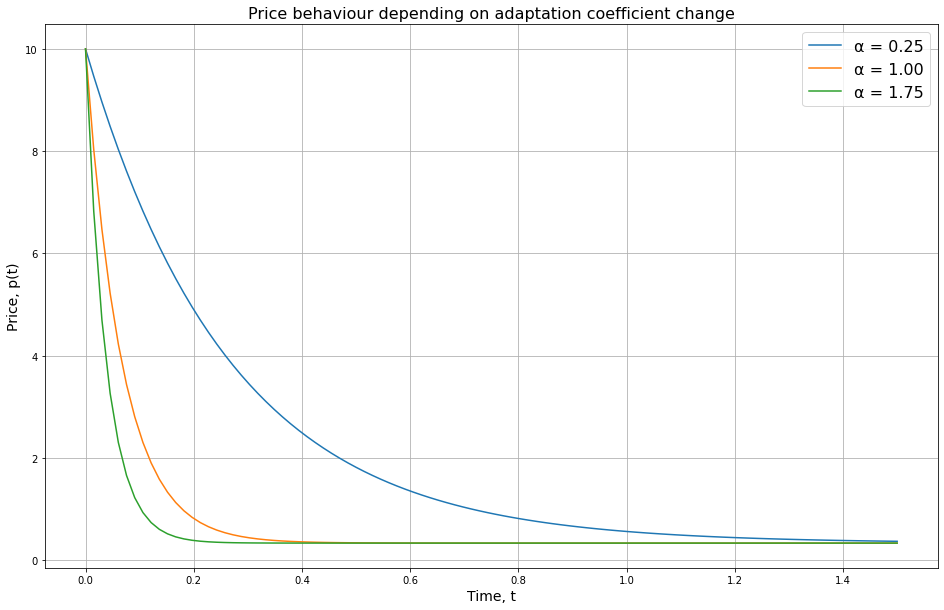

In [8]:
fast_plot(t_space, alphas, 'case1', sd)

In [9]:
hd = BasicOperationsForGivenODE(F2)

In [10]:
F2

(-a*p(t) + b - c*p(t) - d)**3

In [11]:
sol1, sol2 = hd.get_solution(chy=True, s={})

In [12]:
sol1

Eq(p(t), (-a**3*alpha*b*t + a**3*alpha*d*t - a**3*b/(2*a**3*gamma**2 - 4*a**2*b*gamma + 6*a**2*c*gamma**2 + 4*a**2*d*gamma + 2*a*b**2 - 8*a*b*c*gamma - 4*a*b*d + 6*a*c**2*gamma**2 + 8*a*c*d*gamma + 2*a*d**2 + 2*b**2*c - 4*b*c**2*gamma - 4*b*c*d + 2*c**3*gamma**2 + 4*c**2*d*gamma + 2*c*d**2) + a**3*d/(2*a**3*gamma**2 - 4*a**2*b*gamma + 6*a**2*c*gamma**2 + 4*a**2*d*gamma + 2*a*b**2 - 8*a*b*c*gamma - 4*a*b*d + 6*a*c**2*gamma**2 + 8*a*c*d*gamma + 2*a*d**2 + 2*b**2*c - 4*b*c**2*gamma - 4*b*c*d + 2*c**3*gamma**2 + 4*c**2*d*gamma + 2*c*d**2) - 3*a**2*alpha*b*c*t + 3*a**2*alpha*c*d*t - 3*a**2*b*c/(2*a**3*gamma**2 - 4*a**2*b*gamma + 6*a**2*c*gamma**2 + 4*a**2*d*gamma + 2*a*b**2 - 8*a*b*c*gamma - 4*a*b*d + 6*a*c**2*gamma**2 + 8*a*c*d*gamma + 2*a*d**2 + 2*b**2*c - 4*b*c**2*gamma - 4*b*c*d + 2*c**3*gamma**2 + 4*c**2*d*gamma + 2*c*d**2) + 3*a**2*c*d/(2*a**3*gamma**2 - 4*a**2*b*gamma + 6*a**2*c*gamma**2 + 4*a**2*d*gamma + 2*a*b**2 - 8*a*b*c*gamma - 4*a*b*d + 6*a*c**2*gamma**2 + 8*a*c*d*gamma + 2*a*d

In [13]:
Eq(p.diff(t), alpha*(b-a*p)**3)

Eq(Derivative(p(t), t), alpha*(-a*p(t) + b)**3)

In [14]:
ss = dsolve(Eq(p.diff(t), alpha*(b-a*p)**3), p)

In [15]:
ss[0]

Eq(p(t), -sqrt(2)/(2*sqrt(a**3*(C1 + alpha*t))) + b/a)

In [16]:
ss[1]

Eq(p(t), sqrt(2)/(2*sqrt(a**3*(C1 + alpha*t))) + b/a)

In [17]:
ssc = dsolve(Eq(p.diff(t), (b-a*p)**3), p, ics = {p.subs(t, 0): 10})

In [18]:
ssc[0]

Eq(p(t), -sqrt(2)/(2*sqrt(a**3*(t + 1/(2*a*(10*a - b)**2)))) - b*t/(a*(-t - 1/(2*a*(10*a - b)**2))) - b/(2*a**2*(10*a - b)**2*(-t - 1/(2*a*(10*a - b)**2))))

In [19]:
(1/(2*(a+c)**3))*((gamma-((b-d)/(a+c)))**(-2))

1/(2*(a + c)**3*(gamma - (b - d)/(a + c))**2)

In [22]:
diffeq_sol_z3 = Eq(p, ((b-d)/(a+c)) + 1/sqrt(2*((a+c)**3)*(alpha*t*(1/(2*(a+c)**3))*((gamma-((b-d)/(a+c)))**(-2)))))

In [23]:
diffeq_sol_z3

Eq(p(t), (b - d)/(a + c) + 1/sqrt(alpha*t/(gamma - (b - d)/(a + c))**2))

In [29]:
t_space[0] = t_space[0] - 0.0001

<lambdifygenerated-10>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (1/3 + 19.3333333333333/sqrt(t))
<lambdifygenerated-11>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (1/3 + (29/3)/sqrt(t))
<lambdifygenerated-12>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (1/3 + 7.30731314484506/sqrt(t))


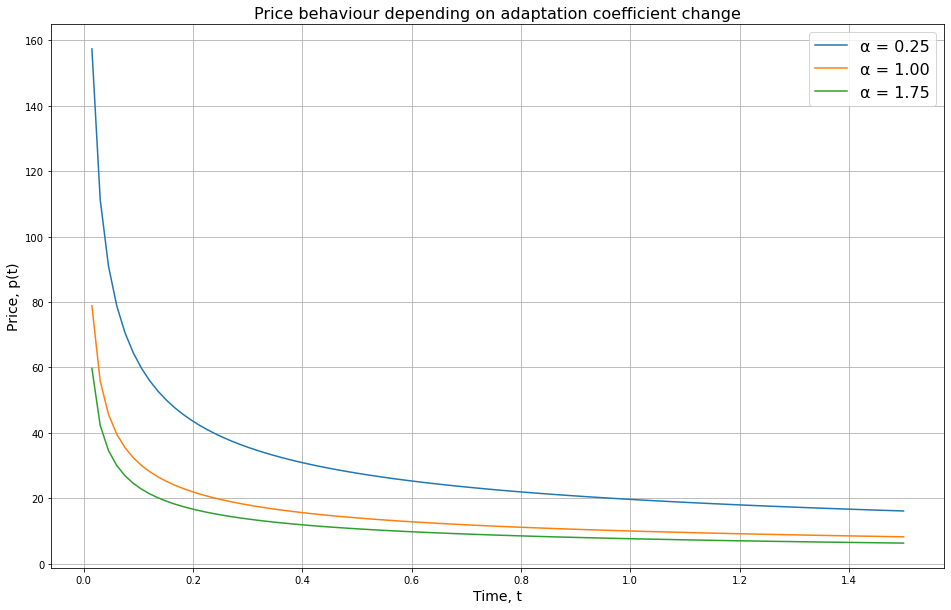

In [30]:
fast_plot(t_space, alphas, 'case1', sd, sol=diffeq_sol_z3)